### **SHRUTI GUPTA**

**DATA SCIENCE AND BUSINESS ANALYST INTERN**

**GRIPS - THE SPARKS FOUNDATION**

### **TASK 6 - Prediction using Decision Tree Algorithm**

Create the Decision Tree classifier and visualize it graphically.

### **Importing the dataset**
The iris dataset was downloaded from the link provided in the tasklist and then from the local computer, uploaded into the labs environment. After this, the pandas library of python was used to create a datframe called iris and the data was loaded into it and displayed.

In [1]:
import sklearn.datasets as datasets
import pandas as pd
data,target = datasets.load_iris(return_X_y=True)
iris = pd.read_csv (r'C:\Users\Shruti Gupta\OneDrive\Desktop\GRIPS\Iris.csv')
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


We can use the shape function to see how many samples of data we have.

In [2]:
iris.shape

(150, 6)

### **Building the Decision Tree Classifier**
Here, we shall use the skikit learn library and the assosciated decision tree classifier module to classify the data fields in the iris dataset. The decision tree model does not support categorical variable, only takes in numerical values. Thus we need to create dummy variables first.

In [3]:
from sklearn import preprocessing
variable=preprocessing.LabelEncoder()
iris["Species"]=variable.fit_transform(iris["Species"])
iris["Species"].unique()

array([0, 1, 2])

We now split the data into test and training sets.

In [4]:
from sklearn.model_selection import train_test_split
x=iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].astype(float)
y=iris['Species']
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)

Now that the species column has numerical data and not categorical, we can go ahead and create a decision tree classifier for the modified dataset as follows:

In [5]:
from sklearn.tree import DecisionTreeClassifier as dtc
import numpy as np
X = np.array(list(x_trainset)).reshape(-1,1)
iris_tree=dtc(criterion='entropy',max_depth=4)
iris_tree.fit(x_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### **Making predictions using the iris tree and the test set**
We now use the previously seperated testing set to make predictions using the iris decision tree classifier thus created.

In [6]:
Pred_tree=iris_tree.predict(x_testset)
print(Pred_tree)

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 2 2 2 0 2 2 2 2 0 2 2 1 2 1 0 0 2 1 0 0 2
 0 2 1 2 1 0 0 2]


Evaluating the performance accuracy of the tree thus obtained

In [7]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, Pred_tree))

DecisionTrees's Accuracy:  0.9111111111111111


Since the accuracy value is close to 1 we can conclude that the model thus obtained is fairly accurate.

### **Visualizing the decision tree classifier created**

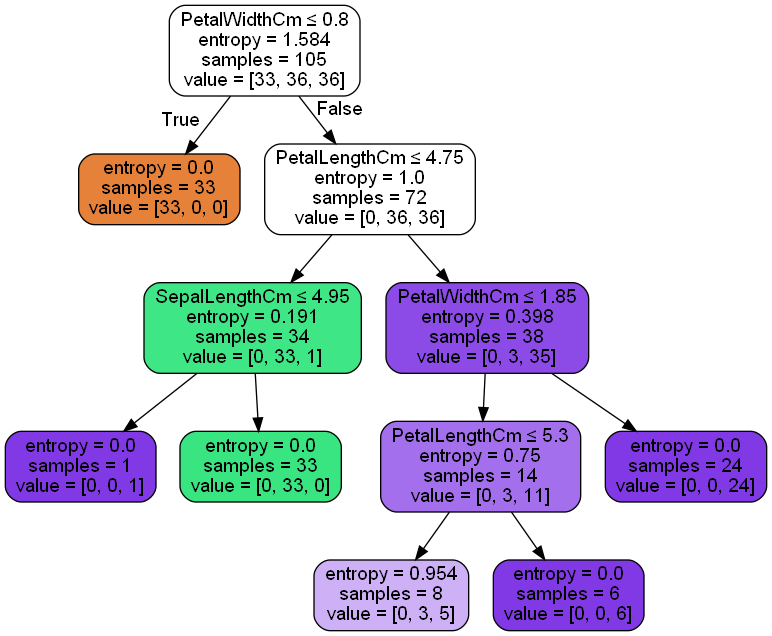

In [8]:
from six import StringIO
import pydotplus
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image
%matplotlib inline 

dot_data = StringIO()
export_graphviz(iris_tree, out_file=dot_data, feature_names=x.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())